In [39]:
%config IPCompleter.greedy=True
import ROOT
import matplotlib.pyplot as plt
import numpy

from DataFormats.FWLite import Events, Handle
genJetsHandle = Handle("std::vector<reco::GenJet>")
genInfo = Handle("GenEventInfoProduct")

In [40]:
# Run this to use files from xrootd
pythiaCUETP8M1_files = [
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/FAAD1700-AFD5-E611-A4FE-00259019A43E.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/F815B4D9-C3D5-E611-AD4D-0CC47A546E5E.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/F4498C6D-4FD6-E611-B470-02163E01444C.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/F20E8C5B-B3D5-E611-A859-02163E0124B7.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/F0C683B8-C1D5-E611-A0A1-0CC47A4C8EE2.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/EE1B822F-C2D5-E611-942C-001E67397DF5.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/E800C251-AED5-E611-A6A1-02163E012B30.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/E62E5A84-A8D5-E611-9343-02163E01450F.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/E4DF6FB3-4FD6-E611-BB6E-A4BF01014073.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/E4DD3C66-4FD6-E611-956A-0023AEEEB208.root",
    "/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/E2B5E8F0-ACD5-E611-815C-02163E013920.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/DE46D8F1-C5D5-E611-8A48-0025905A613C.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/DC702E19-A8D5-E611-B925-02163E019CB1.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/D23355DC-4FD6-E611-94DA-008CFAF73190.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/CC8FD667-B1D5-E611-8764-0025905A6088.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/C885C03F-A8D5-E611-B7B3-002590D9D8BA.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/C407F166-4FD6-E611-A850-0025901E5556.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/BE76F437-A9D5-E611-A9BA-02163E0145DA.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/B86F2AA4-4FD6-E611-BB51-A0000420FE80.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/B43A72EA-A5D5-E611-B18A-10983627C3CE.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/B0A67B5E-B1D5-E611-93C4-02163E019DAD.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/B05F663A-C3D5-E611-B947-00266CFB991C.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/A257F5B1-4FD6-E611-941C-001E67397DF5.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/A2063405-ABD5-E611-8315-02163E019BBD.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/A0DEBA90-C2D5-E611-839D-0CC47A4C8E0E.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/A088B7E8-4FD6-E611-9F1C-002590A83190.root",
    #"/store/mc/RunIISummer16MiniAODv2/WJetsToLNu_TuneCUETP8M1_13TeV-madgraphMLM-pythia8/MINIAODSIM/PUMoriond17_80X_mcRun2_asymptotic_2016_TrancheIV_v6_ext2-v1/80000/9C12279E-4FD6-E611-AC3C-0025905A60B2.root",
]
pythiaCP5_files = [
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FE46BD2B-49A1-164D-BCBB-590D79F903C0.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FDBBD319-B082-E14A-B47D-0E53E7E0C2E4.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FD68CE7E-9A28-B249-85B4-A5A8C3C4ADAF.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FC8857EE-675B-2943-A515-49390D5C4694.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FC747317-96D6-F04C-9EB8-6A57ED431C9A.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FC72F70C-1E61-7C40-AD39-4F5995FAF99D.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FA8FBC7E-7330-314E-A13B-F357260AC8A1.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/FA601ED8-C690-F448-949B-42BD0AC05943.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F9F1FEAC-12F7-A840-A0F5-ED0618E08509.root",
    "/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F95BF1AC-5565-CA4C-955C-ED5ACE8A6B1F.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F4542ED8-25ED-BF41-A71C-DF2578CB0860.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F338AC7E-A908-8A4F-BA9A-79F7F48A6B44.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F1B3A6E9-8C42-7A4A-9639-FC952B06BEA4.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/F14441F6-70A7-5E4B-B18D-735ADB8481C3.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/EE0A95DF-F9E0-5944-8F26-72334B72E363.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/ECBBFE69-E7E1-5D4B-9175-00B29D184865.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/E5F88606-0F99-1B4B-BDFA-7FA121F1C404.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/DEF5E266-C0E0-B041-9A89-DB007CB781E5.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/DE836597-F9D3-A34E-955A-3DE2C64C4F8E.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/DD8C760E-677F-D84F-B81B-199C10EB54EF.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/DB34ADD9-BDD8-504E-8884-E4DB94D0DA02.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/DB31194A-1503-6347-8738-F87984CDEB2C.root",
    #"/store/mc/RunIIAutumn18MiniAOD/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/102X_upgrade2018_realistic_v15-v2/90000/D94A8EC2-0DBE-364F-904A-1CF1F2ED0EF7.root",
]

pythiaCUETP8M1_events = [Events("root://cms-xrd-global.cern.ch/"+i) for i in pythiaCUETP8M1_files]
pythiaCP5_events = [Events("root://cms-xrd-global.cern.ch/"+i) for i in pythiaCP5_files]

#2017 sample, same GEN as 2018
#pythiaCP5_events = Events("root://cmsxrootd.hep.wisc.edu//store/mc/RunIIFall17MiniAODv2/WJetsToLNu_TuneCP5_13TeV-madgraphMLM-pythia8/MINIAODSIM/PU2017_12Apr2018_94X_mc2017_realistic_v14_ext1-v2/90000/0C16FF8C-E081-E811-B7E4-7845C4FB6238.root")

In [ ]:
# Run this to use local files, download them with download.sh
pythiaCP5_events = Events("RootFiles/WJets_CP518_withWeights.root")
pythiaCUETP8M1_events = Events("RootFiles/WJets_CUETP8M1_withWeights.root")

In [47]:
def processEvents(events):
    event_info = {}
    event_info["num_constituents"] = []
    event_info["leading_jet_pt"] = []
    event_info["pt1_frac"] = []
    event_info["pt2_frac"] = []
    event_info["pt3_frac"] = []
    event_info["pt123_frac"] = []
    event_info["leading_pdgids"] = []
    event_info["psweights"] = []
    event_info["nProcessed"] = 0
    event_info["nPassed"] = 0
    for evts in events:
        for i, event in enumerate(evts):
            event_info["nProcessed"] += 1
            if event_info["nProcessed"] % 10000 == 0:
                print "Processing event %i" % event_info["nProcessed"]
            event.getByLabel ("slimmedGenJets", genJetsHandle)
            event.getByLabel ("generator", genInfo)
            central_weight = genInfo.product().weights()[0]
            weights = [w/central_weight for w in genInfo.product().weights()]
            genJets = genJetsHandle.product()
            if genJets.size()==0:
                continue
            leading_jet = genJets.at(0)
            if leading_jet.pt() < 200:
                continue
            event_info["nPassed"] += 1
            event_info["psweights"].append(weights[2:14])
            event_info["leading_jet_pt"].append(leading_jet.pt())
            constits = leading_jet.getJetConstituentsQuick()
            event_info["num_constituents"].append(constits.size())
            pt123 = 0
            pt2_frac = -1
            pt3_frac = -1
            for j, cand in enumerate(constits):
                event_info["leading_pdgids"].append(cand.pdgId())
                if j < 1:
                    event_info["pt1_frac"].append(cand.pt()/leading_jet.pt())
                    pt123 += cand.pt()
                elif j < 2: 
                    pt2_frac = cand.pt()/leading_jet.pt()
                    pt123 += cand.pt()
                elif j < 3:
                    pt3_frac = cand.pt()/leading_jet.pt()
                    pt123 += cand.pt()
                if j == constits.size()-1 or j == 2:
                    event_info["pt2_frac"].append(pt2_frac)
                    event_info["pt3_frac"].append(pt3_frac)
                    event_info["pt123_frac"].append(pt123/leading_jet.pt())
                    break
    return event_info

In [48]:
event_info_cp5 = processEvents(pythiaCP5_events)
event_info = processEvents(pythiaCUETP8M1_events)

Processing event 10000
Processing event 20000
Processing event 30000
Processing event 40000
Processing event 50000
Processing event 60000
Processing event 70000
Processing event 80000
Processing event 90000
Processing event 100000
Processing event 110000
Processing event 120000
Processing event 130000
Processing event 140000
Processing event 150000
Processing event 160000
Processing event 170000
Processing event 180000
Processing event 190000
Processing event 200000
Processing event 210000
Processing event 220000
Processing event 230000
Processing event 240000
Processing event 250000
Processing event 260000
Processing event 270000
Processing event 280000
Processing event 290000
Processing event 300000
Processing event 310000
Processing event 320000
Processing event 330000
Processing event 340000
Processing event 350000
Processing event 360000
Processing event 370000
Processing event 380000
Processing event 390000
Processing event 400000
Processing event 410000
Processing event 420000
P

In [52]:
print("2016EventCount:",event_info["nProcessed"],event_info["nPassed"])
print("2018EventCount:",event_info_cp5["nProcessed"],event_info_cp5["nPassed"])
print("psweights18: ", event_info_cp5["psweights"][0])

('2016EventCount:', 768511, 1210)
('2018EventCount:', 465436, 897)
('psweights18: ', [0.9867856952937261, 1.2288680654691515, 1.0054504947431175, 0.8116063866129759, 0.9639766595373852, 1.5050977036538136, 1.0046862527068297, 0.6568635557614558, 0.8605013277532491, 0.7645192273616663, 0.9894761301975368, 0.46607045657163726])


In [53]:
def makeVariationsPlot(var_name, info2016, info_cp5, bins, range, legloc=1, noPS_weights=False,weights=[]):
    plt.hist(info2016[var_name], bins, range=range, normed=True, histtype=('step' if noPS_weights else 'bar'), alpha=0.5, label='CUETP8M1 (2016)');
    plt.hist(info_cp5[var_name], bins, range=range, normed=True, histtype=('step' if noPS_weights else 'bar'), alpha=0.5, label='CP5 (2018)');
    if not noPS_weights:
        wgts = weights if weights != [] else info_cp5["psweights"]
        plt.hist(info_cp5[var_name], bins, weights=[entry[0] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 1');
        plt.hist(info_cp5[var_name], bins, weights=[entry[1] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 2');
        plt.hist(info_cp5[var_name], bins, weights=[entry[2] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 3');
        plt.hist(info_cp5[var_name], bins, weights=[entry[3] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 4');
        plt.hist(info_cp5[var_name], bins, weights=[entry[4] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 5');
        plt.hist(info_cp5[var_name], bins, weights=[entry[5] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 6');
        plt.hist(info_cp5[var_name], bins, weights=[entry[6] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 7');
        plt.hist(info_cp5[var_name], bins, weights=[entry[7] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 8');
        plt.hist(info_cp5[var_name], bins, weights=[entry[8] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 9');
        plt.hist(info_cp5[var_name], bins, weights=[entry[9] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 10');
        plt.hist(info_cp5[var_name], bins, weights=[entry[10] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 11');
        plt.hist(info_cp5[var_name], bins, weights=[entry[11] for entry in wgts], range=range,density=True, histtype='step', alpha=0.5, label='CP5 (2018) PS weight 12');
        plt.legend(loc=legloc, prop={'size': 6})
    else:
        plt.legend(loc=legloc)
    plt.show()

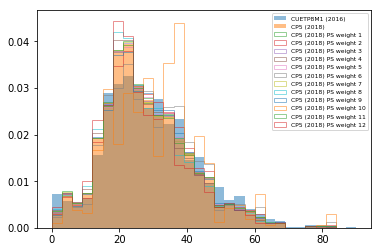

In [59]:
makeVariationsPlot("num_constituents", event_info, event_info_cp5, 30, (0,90),1)

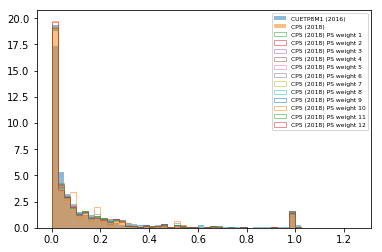

In [56]:
makeVariationsPlot("pt1_frac", event_info, event_info_cp5, 50, (0,1.25),1)

ValueError: weights should have the same shape as x

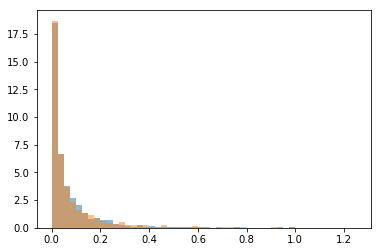

In [60]:
makeVariationsPlot("pt2_frac", event_info, event_info_cp5, 50, (0,1.25))

In [ ]:
makeVariationsPlot(pt3_frac, weights, pt3_frac_cp5, weights_cp5, 50, (0,0.5),1)

In [ ]:
makeVariationsPlot(pt123_frac, weights, pt123_frac_cp5, weights_cp5, 20, (0,1),1, noPS_weights=True);

2671
2680


ValueError: weights should have the same shape as x

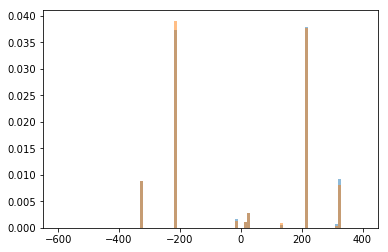

In [66]:
bins = 100
range=(-600,400)
corr_weights = []
num_two = 0
# Need a weight for each PDG ID, entered multiple times per event
for i, entry in enumerate(event_info_cp5["num_constituents"]):
    if entry > 0:
        corr_weights.append(event_info_cp5["psweights"][i])
    if entry > 1:
        corr_weights.append(event_info_cp5["psweights"][i])
    if entry > 3:
        corr_weights.append(event_info_cp5["psweights"][i])
print len(corr_weights)
print len(event_info_cp5["leading_pdgids"])
makeVariationsPlot("leading_pdgids", event_info, event_info_cp5, bins, range, 1,weights=corr_weights);

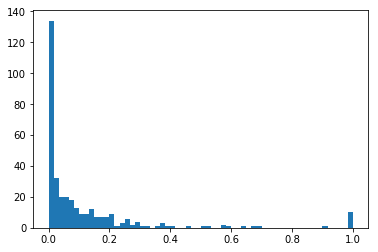

In [61]:
plt.hist(pt1_frac_cp5, bins=60, range=(0,1));

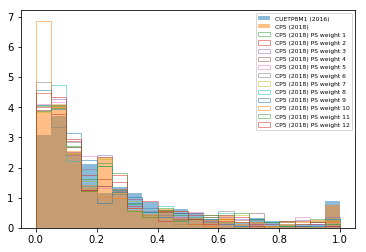

In [48]:
makeVariationsPlot(pt123_frac, weights, pt123_frac_cp5, weights_cp5, 20, (0,1),1)

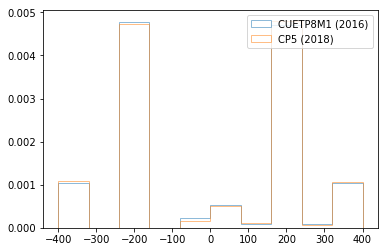

In [63]:
bins = 10
range=(-400,400)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,1, noPS_weights=True);

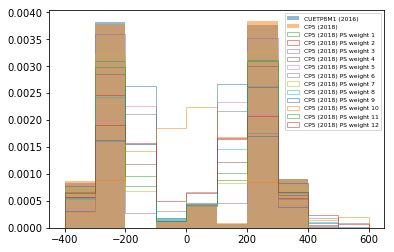

In [52]:
bins = 10
range=(-400,600)
makeVariationsPlot(leading_pdgids, weights, leading_pdgids_cp5, weights_cp5, bins, range,1);

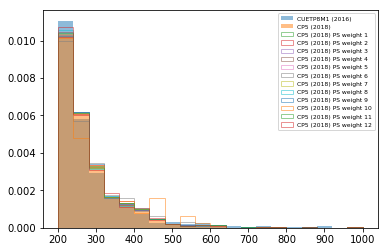

In [62]:
bins = 20
range=(200,1000)
makeVariationsPlot("leading_jet_pt", event_info, event_info_cp5, bins, range)